# Analysis 1
 
1. What are the top three body parts most frequently represented in this dataset?
2. What are the top three body parts that are least frequently represented?

In [46]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [58]:
#Reading the required files
df1=pd.read_csv(r"NEISS data/NEISS2014.csv")
df2=pd.read_csv(r"NEISS data/BodyParts.csv")
print(df1.head())
print(df2.head())

   CPSC Case # trmt_date  psu  weight stratum  age     sex         race  \
0    141200216  10/23/14   63  99.704       M   21  Female  None listed   
1    140117851    1/4/14   63  81.576       M   62  Female        White   
2    150144993   8/17/14   63  99.704       M   21  Female  None listed   
3    150230176   7/27/14   63  99.704       M   30  Female  None listed   
4    141220717    9/8/14   63  99.704       M   16    Male  None listed   

  race_other  diag diag_other  body_part  disposition  location  fmv  prod1  \
0        NaN    62        NaN         75            1         1    0    679   
1        NaN    57        NaN         79            1         1    0   1807   
2        NaN    57        NaN         83            1         0    0   1333   
3        NaN    64        NaN         79            1         1    0   4076   
4        NaN    57        NaN         82            1         0    0   1893   

    prod2                                          narrative  
0  1807.0  

In [59]:
#Performing a left join to combine the body part code of df1 with the body part name in df2
df3=pd.merge(df1,df2, how="left", left_on="body_part",right_on="Code")

In [60]:
#Filtering data which has the value 'Not Recorded' since that is data which does not have recorded data
df3=df3[(df3['BodyPart']!='Not Recorded')]

In [61]:
#Calculating frequency of occurence of each body part
df4=df3.groupby("BodyPart")['BodyPart'].agg(['count'])
print(df4.head())
df4=df4.reset_index().rename(columns={'count': 'Frequency'})
print(df4.head())

                count
BodyPart             
25-50% of body      4
>50% of body     1422
Ankle            3781
Arm, lower       2561
Arm, upper        745
         BodyPart  Frequency
0  25-50% of body          4
1    >50% of body       1422
2           Ankle       3781
3      Arm, lower       2561
4      Arm, upper        745


In [62]:
#Sorting the values based on frequency
df5=df4.sort_values(['Frequency'],ascending=False)
print(df5.head())
df5=df5.reset_index(drop=True)
print(df5.head())

        BodyPart  Frequency
12          Head       9891
8           Face       5786
9         Finger       5783
22  Trunk, lower       5717
23  Trunk, upper       3868
       BodyPart  Frequency
0          Head       9891
1          Face       5786
2        Finger       5783
3  Trunk, lower       5717
4  Trunk, upper       3868


In [63]:
#Selecting top three body parts based on frequency
df6=df5.head(3)
print("Top three body parts most frequently represented in this dataset")
print(df6)

Top three body parts most frequently represented in this dataset
  BodyPart  Frequency
0     Head       9891
1     Face       5786
2   Finger       5783


In [64]:
#Selecting bottom three body parts based on frequency
df7=df5.tail(3)
print("Top three body parts least frequently represented in this dataset")
print(df7)

Top three body parts least frequently represented in this dataset
          BodyPart  Frequency
22        Internal        549
23    Pubic region        286
24  25-50% of body          4


In [65]:
#Selecting top three and botton three in a single statement
df7 = df5.iloc[np.r_[0:3, -3:0]]
print(df7)

          BodyPart  Frequency
0             Head       9891
1             Face       5786
2           Finger       5783
22        Internal        549
23    Pubic region        286
24  25-50% of body          4


In [66]:
# Visualizing frequency of occurence of body parts represented in this dataset
v1=df5.head()
v2=df5.tail()

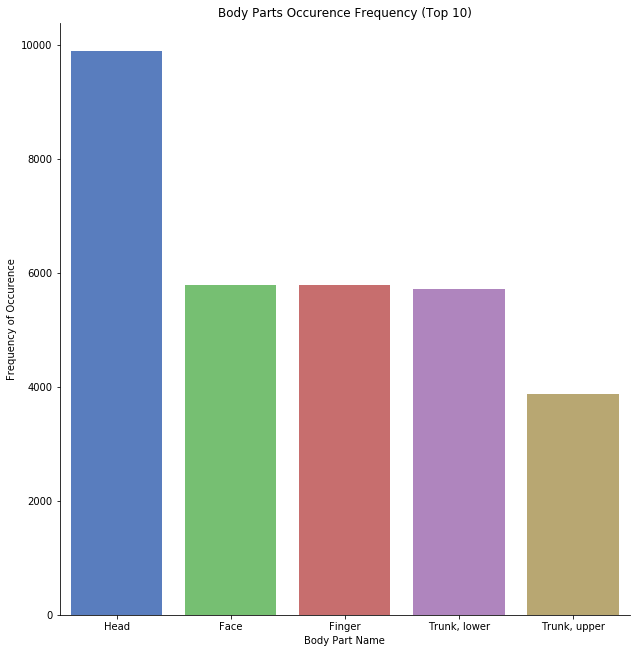

In [67]:
g=sb.factorplot(x="BodyPart", y="Frequency",
                               data=v1, kind="bar",
                               size=9, palette="muted")

plt.title('Body Parts Occurence Frequency (Top 10)')
plt.xlabel('Body Part Name')
plt.ylabel('Frequency of Occurence')
plt.show()

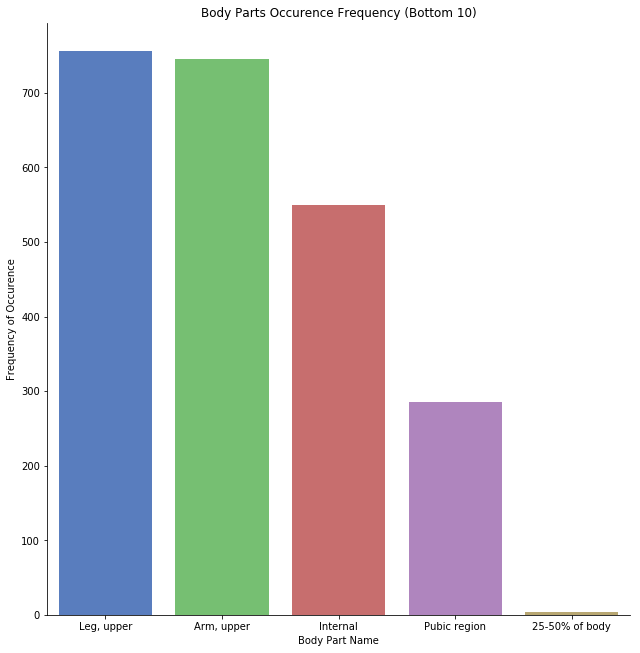

In [68]:
g=sb.factorplot("BodyPart", "Frequency",
                               data=v2, kind="bar",
                               size=9, palette="muted")

plt.title('Body Parts Occurence Frequency (Bottom 10)')
plt.xlabel('Body Part Name')
plt.ylabel('Frequency of Occurence')
plt.show()